# Prediction of Score Based on No. of Study Hours

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print('Data Imported Sucessfully')

s_data.head(10)

Data Imported Sucessfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


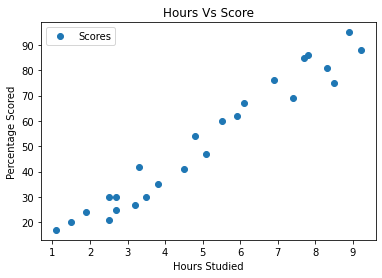

In [5]:
#plotting the distribution of curve
s_data.plot(x='Hours', y='Scores', style = 'o')
plt.title('Hours Vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

Positive Linear relationship between the hours studied and scores

In [6]:
#preparing Data
x = s_data.iloc[:,:-1].values
y = s_data.iloc[:,1].values

In [7]:
#other method
x = s_data[['Hours']].values
y = s_data[['Scores']].values

In [8]:
from sklearn.model_selection import train_test_split 
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

Training of the Model

In [9]:
#Training 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print('Training Complete')

Training Complete


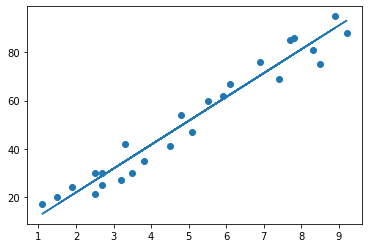

In [10]:
#plotting for the regression curve
line = regressor.coef_*x+regressor.intercept_   # y = mx +

#plotting for test data
plt.scatter(x,y)

plt.plot(x,line)
plt.show()

Making Prediction

In [30]:
print(x_test) # in Hours
y_pred = regressor.predict(x_test) # Predicting the Scores
y_test, y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


(array([[20],
        [27],
        [69],
        [30],
        [62]], dtype=int64),
 array([[16.88414476],
        [33.73226078],
        [75.357018  ],
        [26.79480124],
        [60.49103328]]))

In [32]:
#flatting 2d np array to 1d
y_test1 = np.ravel(y_test)
y_pred1 = np.ravel(y_pred)

In [34]:
#comparsion of Actual and Predcited Score
data = {'Actual':y_test1, 'Predicted':y_pred1}
df = pd.DataFrame(data)
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [41]:
score_pred = np.array([9.25, 5.3])
score_pred = score_pred.reshape(-1,1)
predict = regressor.predict(score_pred)
score_pred,predict

(array([[9.25],
        [5.3 ]]),
 array([[93.69173249],
        [54.54463939]]))

Evaluation of Model

In [42]:
from sklearn import metrics
print('Mean Absolute error:', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute error: 4.183859899002975
